In [ ]:
import io
import requests

import datasets
from utils import draw_pose

In [2]:
dataset = datasets.load_dataset("clement-bonnet/coco_val2017_100_text_image_pose", split="test")
dataset

Dataset({
    features: ['file_name', 'license', 'coco_url', 'caption', 'id', 'pose'],
    num_rows: 100
})

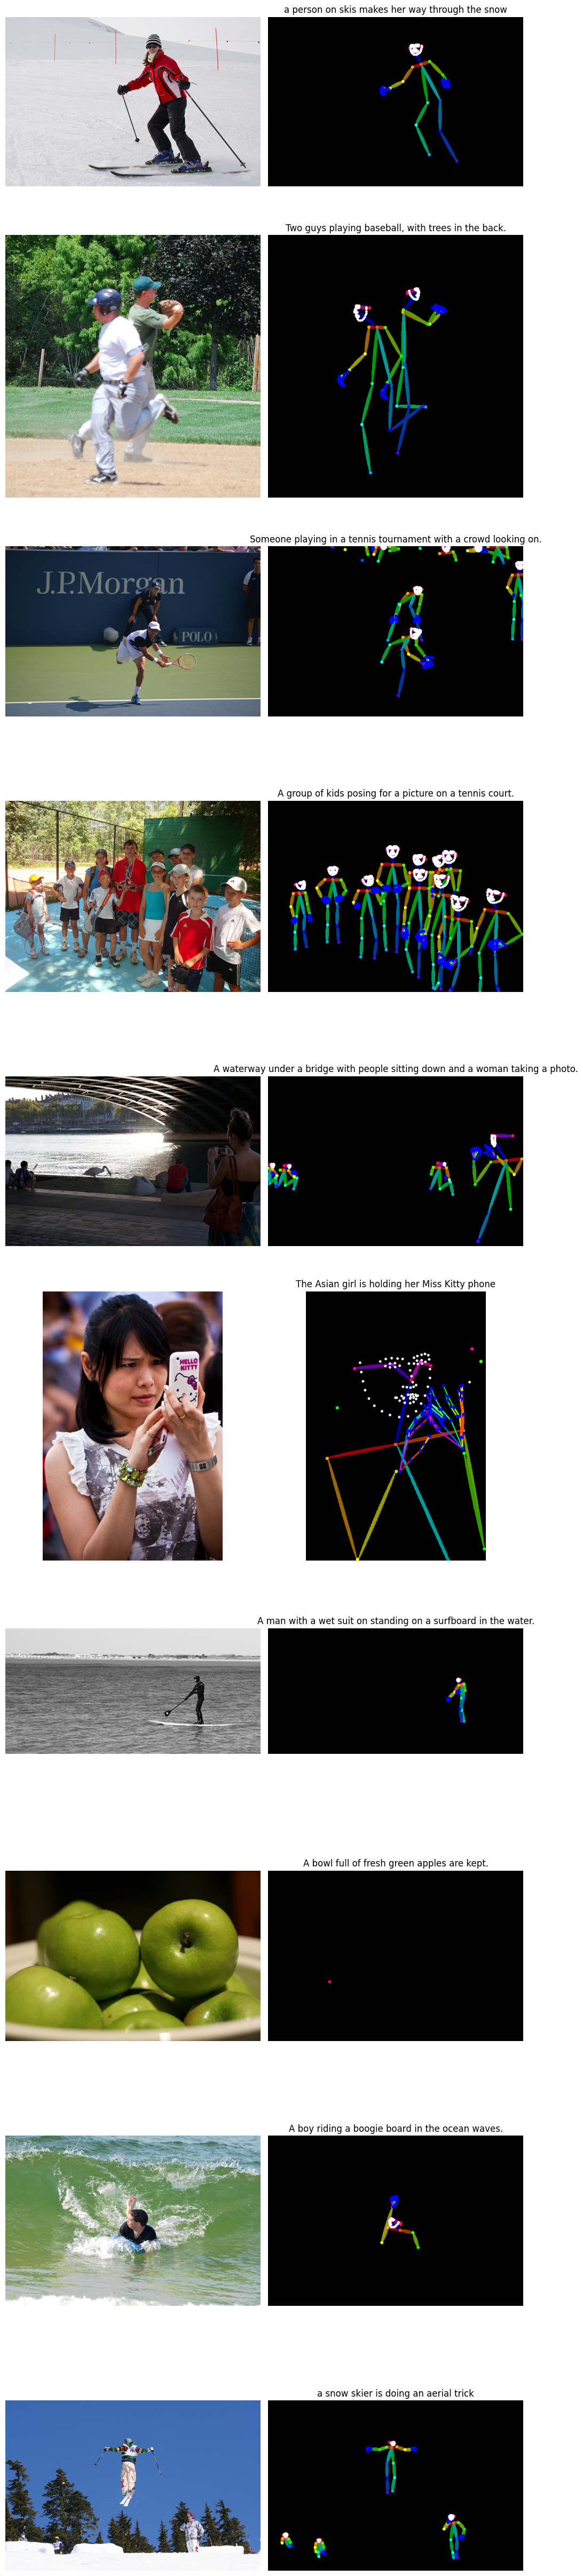

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

num_elements = 10
_, axarr = plt.subplots(num_elements, 2, figsize=(10, 5*num_elements))

for i in range(num_elements):
    file_name = dataset[i]["file_name"]
    caption = dataset[i]["caption"]
    response = requests.get(dataset[i]["coco_url"])
    image = Image.open(io.BytesIO(response.content))

    pose_image = Image.fromarray(draw_pose(dataset[i]["pose"], height=image.height, width=image.width))

    axarr[i, 0].imshow(image)
    axarr[i, 0].axis("off")
    axarr[i, 1].imshow(pose_image)
    axarr[i, 1].axis("off")
    axarr[i, 1].set_title(caption)

plt.tight_layout();